In [166]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


In [167]:
a = 2
b = 10
c = 7
f = 4


In [168]:
e = a * b
d = e + c
L = f * d

In [169]:
L

108

In [170]:
def manual_gradient():

    a = 2
    b = 10
    c = 7
    f = 4


    h = 0.01
    
    e = a * b
    d = e + c
    L = f * d

    
    a += h

    e = a * b
    d = e + c
    L_ = f * d 

    dL_df = (L_ - L) / h     #partial derivative

    return dL_df
    
    

In [171]:
manual_gradient()

39.99999999999915

## Value class

In [172]:
class Val():


    def __init__(self,data,children = () , op="",label = "" ):

        self.data = data
        self.op = op
        self.children = children
        self.label = label
        self.grad = 0



    def __repr__(self):
        return f"Value(data={self.data})"


    
    def __add__(self,other):
        out =  Val((self.data + other.data),(self,other), "+")



        def backward():
            self.grad = 1* out.grad
            other.grad = 1* out.grad
            

        return out


    def __mul__(self,other):
        out = Val((self.data*other.data),(self,other),"*")

        def backward():
            self.grad = other.grad * out.grad
            other.grad = self.grad * out.grad


        return out



    

        

        


    







    

In [173]:
a = Val(2) ; a.label = "a"
b = Val(10) ; b.label = "b"

c = Val(7) ; c.label = "c"
f = Val(4) ; f.label = "f"


In [174]:
e = a*b ; e.label = "e"
e.label

'e'

In [175]:
d = e + c ; d.label = "d"

In [176]:
L = f * d ; L.label = "L"

In [177]:
print(a.__dict__)

{'data': 2, 'op': '', 'children': (), 'label': 'a', 'grad': 0}


In [178]:
print(L.__dict__)

{'data': 108, 'op': '*', 'children': (Value(data=4), Value(data=27)), 'label': 'L', 'grad': 0}


In [179]:
print(L.children[1].__dict__)

{'data': 27, 'op': '+', 'children': (Value(data=20), Value(data=7)), 'label': 'd', 'grad': 0}


In [180]:
print(e.__dict__)

{'data': 20, 'op': '*', 'children': (Value(data=2), Value(data=10)), 'label': 'e', 'grad': 0}


In [181]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.children:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n.op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.op, label = n.op)
      # and connect this node to it
      dot.edge(uid + n.op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.op)

  return dot

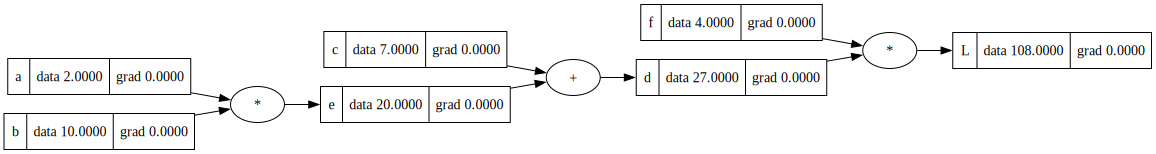

In [182]:
draw_dot(L)

In [183]:
c.children

()

In [184]:
def backprop(root,grad = 1):


    if root.children == ():
        return 

    root.grad = grad
    
    left = root.children[0]
    right = root.children[1]

    print(left,right)

    if root.op == "+":
        left.grad = root.grad
        right.grad = root.grad
        print("+",left.grad,right.grad)
    else:
        left.grad = right.data *root.grad
        right.grad = left.data *root.grad
        print("*",left.grad,right.grad)

    chain(left,left.grad)
    chain(right,right.grad)

    return

    
    

In [185]:
chain(L)

Value(data=4) Value(data=27)
* 27 4
Value(data=20) Value(data=7)
+ 4 4
Value(data=2) Value(data=10)
* 40 8


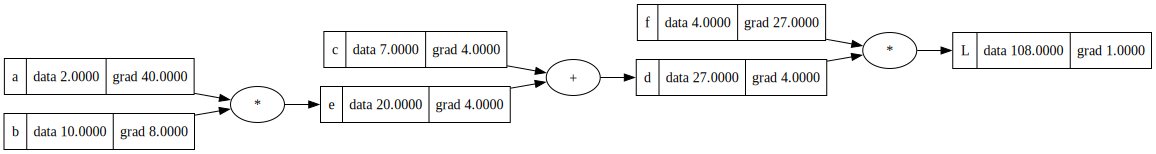

In [186]:
draw_dot(L)

In [187]:
print(a.__dict__)

{'data': 2, 'op': '', 'children': (), 'label': 'a', 'grad': 40}


In [188]:
a.data -= 0.01 * a.grad
b.data -= 0.01 * b.grad
c.data -= 0.01 * c.grad
f.data -= 0.01 * f.grad


In [189]:
print(a.__dict__)

{'data': 1.6, 'op': '', 'children': (), 'label': 'a', 'grad': 40}


In [190]:
print(e.__dict__)

{'data': 20, 'op': '*', 'children': (Value(data=1.6), Value(data=9.92)), 'label': 'e', 'grad': 4}


In [191]:
e.data = a.data * b.data
d.data = e.data + c.data
L.data = f.data * d.data

In [192]:
print(e.__dict__)

{'data': 15.872, 'op': '*', 'children': (Value(data=1.6), Value(data=9.92)), 'label': 'e', 'grad': 4}


In [193]:
L.data

85.16336

In [194]:
chain(L)

Value(data=3.73) Value(data=22.832)
* 22.832 3.73
Value(data=15.872) Value(data=6.96)
+ 3.73 3.73
Value(data=1.6) Value(data=9.92)
* 37.001599999999996 5.968


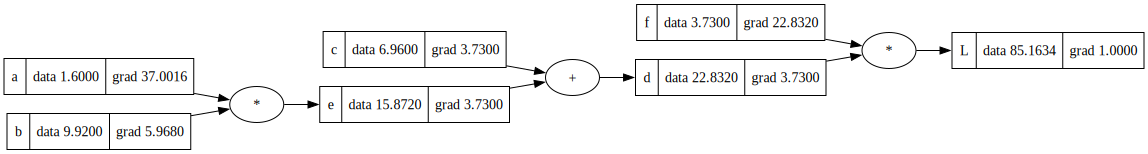

In [195]:
draw_dot(L)

## Automate forward backward

In [198]:
def forward(a,b,c,f,e,d,L):

    e.data = (a * b).data
    d.data = (e + c).data
    L.data = (f * d).data

    return 

    

In [197]:
forward(a,b,c,d,e,d,L)

{'data': 1.6, 'op': '', 'children': (), 'label': 'a', 'grad': 37.001599999999996}
{'data': 6.96, 'op': '', 'children': (), 'label': 'c', 'grad': 3.73}
{'data': 15.872, 'op': '*', 'children': (Value(data=1.6), Value(data=9.92)), 'label': 'e', 'grad': 3.73}
{'data': 22.832, 'op': '+', 'children': (Value(data=15.872), Value(data=6.96)), 'label': 'd', 'grad': 3.73}
{'data': 15.872, 'op': '*', 'children': (Value(data=1.6), Value(data=9.92)), 'label': 'e', 'grad': 3.73}


In [ ]:
def update():
    a.data -= 0.01 * a.grad
    b.data -= 0.01 * b.grad
    c.data -= 0.01 * c.grad
    f.data -= 0.01 * f.grad
    return 

In [ ]:
a = Val(2) ; a.label = "a"
b = Val(10) ; b.label = "b"
c = Val(7) ; c.label = "c"
f = Val(4) ; f.label = "f"


e = a*b ; e.label = "e"
d = e + c ; d.label = "d"
L = f * d ; L.label = "L"


max_iter = 20


for i in range(max_iter):

    forward()